In [26]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk import sent_tokenize
from nltk import word_tokenize

import tensorflow as tf
import tensorflow_hub as hub

stop_words = stopwords.words()

def cleaning(text):        
    
    text = re.sub(r"won't", "will not",text)
    text = re.sub(r"can\'t", "can not",text)
    text = re.sub(r"n\'t", " not",text)
    text = re.sub(r"\'re", " are",text)
    text = re.sub(r"\'s", " is",text)
    text = re.sub(r"\'d", " would",text)
    text = re.sub(r"\'ll", " will",text)
    text = re.sub(r"\'t", " not",text)
    text = re.sub(r"\'ve", " have",text)
    text = re.sub(r"\'m", " am",text)
    text = re.sub('RT'," ", text)
    

    text = re.sub("\$RESERVED\$ \$MENTION\$|\$NUMBER\$|\$MENTION\$",' ', text)
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('[’“”…]', ' ', text)   
    
    
    text = re.sub('user'," ", text)
    text = re.sub('url'," ", text)
    
    text = re.sub('reserved'," ", text)
    
    
    
    
    
    
    text = re.sub("[^A-Za-z]",' ',text)
    

    # removing the emojies               
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r' ', text)   
    
    
    
    
    
    
    return text




    
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(text):
    return model(text)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ravitiwari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ravitiwari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2021-12-02 10:13:35.566001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


2021-12-02 10:13:36.287418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [27]:
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [28]:
data=pd.read_csv("NEW_DATA_RT.csv")
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.dropna(inplace=True)

data.tweet=data.tweet.apply(cleaning)

y=data['label']
x=data['tweet']    

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y)

X_train_tweet = embed(list(X_train))
X_test_tweet = embed(list(X_test))

#X_train=embed(list(x))




2021-12-02 10:13:41.461573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [29]:
data.label.value_counts()

normal        19658
depression     8000
suicide        4384
Name: label, dtype: int64

In [30]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)
svm.fit(X_train_tweet, y_train)

pickle.dump(svm,open("model.pkl","wb"))


In [31]:
model_1 = pickle.load(open("model.pkl","rb"))

test_input=input()
li=[]
li.append(test_input)

test_embed=embed(li)



ill never forget how the depression and loneliness felt good and bad at the same time  still does 


In [32]:
predicted=model_1.predict(test_embed)
print(predicted)

['normal']


In [33]:
svm.predict(test_embed)

array(['normal'], dtype=object)

In [34]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)
svm.fit(X_train_tweet, y_train)
svm.predict(test_embed)

array(['normal'], dtype=object)

In [35]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [36]:
def train_test_model(model, X_train, X_test, y_train, y_test,labels):
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print("="*80)
    print('Start testing...', end='')
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    metrics_report = classification_report(y_test, predictions, target_names=labels)
    precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
    print('done!')
    print("="*80)
    return predictions, accuracy, metrics_report, (precision, recall, fscore)

In [37]:
labels_=['Depression','Normal','Smoking']

Start training...done!
Start testing...done!
accuracy: 0.6135122484006865
              precision    recall  f1-score   support

  Depression       0.00      0.00      0.00      1600
      Normal       0.61      1.00      0.76      3932
     Smoking       0.00      0.00      0.00       877

    accuracy                           0.61      6409
   macro avg       0.20      0.33      0.25      6409
weighted avg       0.38      0.61      0.47      6409



/Users/ravitiwari/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ravitiwari/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ravitiwari/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

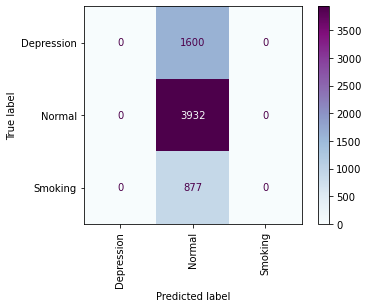

In [38]:
log_model=LogisticRegression(penalty='l2',max_iter=1000)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(log_model, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

In [4]:
data=pd.read_csv("dummy_data.csv")

In [5]:
data

,Unnamed: 0,text,label
0,616,he is here every one on council is here,normal
1,460,how many women commited jouhar to avoid rape a...,normal
2,372,well you are dumped,normal
3,287,could you guys go say hey to this guy for me...,suicide
4,136,depression is the inability to construct a fut...,depression
...,...,...,...
615,584,bitch you are so brave and smart and hysterica...,normal
616,219,im almost done i posted on here months ago say...,suicide
617,394,says he is the best tx he is for ending open b...,normal
618,18,the perfect is the enemy of the good,depression


In [6]:
data.label.value_counts()

normal        298
depression    171
suicide       151
Name: label, dtype: int64

In [7]:
li=['My worst habit used to be smoking but I quit.',
   "Just when it can't get any worse, you run out of cigarettes.",
   "Bless the saints! It's an ashtray! I’ve been thinking of taking up smoking, this clinches it.",
   "Jonathan Mardukas: Come on, cigarettes are killers.",
   "Mister Young, we have got to talk. Would you like a cigarette?",
   "No thanks, that shit'll kill ya.",
   "Sergeant, you get that contraband stokey out of my face, or I'll shove it up your ass so far you'll have to set fire to your nose to light it.",
   "I smoke ten to fifteen cigars a day. At my age I have to hold on to something.",
    "Frankly, my dear, I don't give a damn.",
   "I'm going to make him an offer he can't refuse.",
   "You don't understand! I coulda had class. I coulda been a contender. I could've been somebody, instead of a bum, which is what I am",
    "Toto, I've got a feeling we're not in Kansas anymore.",
   "Fasten your seatbelts. It's going to be a bumpy night."]

In [8]:
data=pd.DataFrame((li))

In [9]:
data

,0
0,My worst habit used to be smoking but I quit.
1,"Just when it can't get any worse, you run out ..."
2,Bless the saints! It's an ashtray! I’ve been t...
3,"Jonathan Mardukas: Come on, cigarettes are kil..."
4,"Mister Young, we have got to talk. Would you l..."
5,"No thanks, that shit'll kill ya."
6,"Sergeant, you get that contraband stokey out o..."
7,I smoke ten to fifteen cigars a day. At my age...
8,"Frankly, my dear, I don't give a damn."
9,I'm going to make him an offer he can't refuse.


In [10]:
p=[]
for i in range(len(li)):
    if i<=7:
        p.append('smoking')
    else:
        p.append('normal')

In [11]:
p

['smoking',
 'smoking',
 'smoking',
 'smoking',
 'smoking',
 'smoking',
 'smoking',
 'smoking',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal']

In [12]:
data['label']=p
data

,0,label
0,My worst habit used to be smoking but I quit.,smoking
1,"Just when it can't get any worse, you run out ...",smoking
2,Bless the saints! It's an ashtray! I’ve been t...,smoking
3,"Jonathan Mardukas: Come on, cigarettes are kil...",smoking
4,"Mister Young, we have got to talk. Would you l...",smoking
5,"No thanks, that shit'll kill ya.",smoking
6,"Sergeant, you get that contraband stokey out o...",smoking
7,I smoke ten to fifteen cigars a day. At my age...,smoking
8,"Frankly, my dear, I don't give a damn.",normal
9,I'm going to make him an offer he can't refuse.,normal


In [13]:
data.rename(columns={0:'text'},inplace=True)
data

,text,label
0,My worst habit used to be smoking but I quit.,smoking
1,"Just when it can't get any worse, you run out ...",smoking
2,Bless the saints! It's an ashtray! I’ve been t...,smoking
3,"Jonathan Mardukas: Come on, cigarettes are kil...",smoking
4,"Mister Young, we have got to talk. Would you l...",smoking
5,"No thanks, that shit'll kill ya.",smoking
6,"Sergeant, you get that contraband stokey out o...",smoking
7,I smoke ten to fifteen cigars a day. At my age...,smoking
8,"Frankly, my dear, I don't give a damn.",normal
9,I'm going to make him an offer he can't refuse.,normal


In [14]:
data.to_csv("Dummy_Data.csv")